# Raman Spectroscopy Data Analysis of API Compounds

This project analyzes Raman spectra of 32 active pharmaceutical ingredients (APIs) to explore their chemical signatures and assess whether spectral data alone can reliably distinguish between different compounds.

Using a combination of data preprocessing, visualization, and machine learning, we aim to uncover structure in the spectra and validate classification performance.

## Goals

- Preprocess and normalize high-dimensional Raman spectra
- Visualize patterns and separability using PCA, t-SNE, UMAP
- Classify compounds using machine learning (Logistic Regression, SVM)
- Identify the most informative Raman shifts for compound discrimination
- Compare model-selected features to known spectral bands

## Steps

1. **Data Loading** – Import spectral data and compound metadata
2. **Preprocessing** – Normalize intensities and reformat Raman shift columns
3. **Single Spectrum Plot** – Visualize one spectrum and overlay expected bands
4. **Average Spectrum** – Plot mean spectra for selected compounds
5. **Peak Detection** – Use signal processing to highlight key spectral peaks
6. **PCA Visualization** – Reduce dimensionality and visualize compound clusters
7. **Classification** – Apply logistic regression and evaluate performance
8. **t-SNE and UMAP Visualization** – Create a non-linear 2D embedding of spectral data
9. **Feature Importance** – Identify which Raman shifts drive classification

---



## Step 1: Data Loading, Preprocessing & Sample Visualization

We start by importing necessary libraries and reading in the metadata and Raman spectral data. Each row in the spectral dataset corresponds to a spectrum associated with a specific API compound. We'll normalize the spectra to bring all features to a comparable scale, then visualize an example to understand the data better.


In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Set the base path to your data
base_path = '/Users/.../...'

# Load metadata (API information)
metadata_path = os.path.join(base_path, 'API_Product_Information.xlsx')
metadata = pd.read_excel(metadata_path)
display(metadata.head())

# Load Raman spectral data
spectra_path = os.path.join(base_path, 'raman_spectra_api_compounds.csv')
spectra_df = pd.read_csv(spectra_path)
display(spectra_df.head())

# Dataset overview
print("Number of unique compounds:", spectra_df['label'].nunique())
print("Total number of spectra:", len(spectra_df))
print("Missing values:", spectra_df.isnull().sum().sum())



,Compound,Organic,Solvent / Reagent,Common Application,Formula,Approx. Raman bands (deviation of 2 cm-1 per external sources),Supplier - Product,Assay %,Exposure (secs),Pixel Fill %,Samples
0,"1,3-Dimethyl-2-imidazolidinone",Y,Both,Intermediate,C5H10N2O,"279, 326, 520, 581, 766, 964, 1031, 1183, 1452...",TCI America - D1477,99.0,3.0,50,109
1,2-Propanol,Y,Solvent,Reactant,C3H8O,"373, 429, 489, 820, 953, 1132, 1342, 1452, 272...","Scharlau - for analysis, ExpertQ®, ACS, ISO, R...",99.8,5.0,50,109
2,"2,2-Dimethoxypropane",Y,Solvent,Intermediate,C5H12O2,"263, 399, 552, 583, 731, 828, 927, 1081, 1442,...",Sigma Aldrich - Reagent,98.0,5.0,60,107
3,4-Methyl-2-pentanone,Y,Both,Intermediate,C6H12O,"318, 419, 594, 785, 817, 959, 1124, 1451, 1464...",Sigma Aldrich – for HPLC,99.5,15.0,50,100
4,Acetic acid,Y,Both,Reactant,CH3COOH,"446, 622, 894, 1429, 1668, 2943, 2994","Scharlau - for analysis, ExpertQ®, ACS, ISO, R...",99.8,7.5,60,113


,150.0,151.0,152.0,153.0,154.0,155.0,156.0,157.0,158.0,159.0,...,3417.0,3418.0,3419.0,3420.0,3421.0,3422.0,3423.0,3424.0,3425.0,label
0,2975.316162,2954.086182,2934.369385,2913.032959,2888.102783,2859.719482,2830.151855,2802.727051,2780.262451,2763.858643,...,805.636475,750.080505,501.523346,633.276245,1011.624146,938.956909,618.756042,536.374512,539.313660,"1,3-Dimethyl-2-imidazolidinone"
1,2562.031006,2530.818359,2504.126465,2482.523193,2463.468506,2443.604492,2421.537598,2398.885742,2378.914795,2364.093750,...,775.733398,473.567291,307.862976,694.032776,1100.932495,1034.330078,812.028442,643.311768,453.844269,"1,3-Dimethyl-2-imidazolidinone"
2,3706.918701,3675.912109,3649.161621,3625.712158,3603.918701,3582.241943,3560.217285,3538.892822,3520.142578,3505.149414,...,6174.322266,6202.327148,5898.275391,6000.154785,6350.005859,6264.735840,5855.383789,5519.607910,5564.967773,"1,3-Dimethyl-2-imidazolidinone"
3,2986.164795,2960.689209,2938.452881,2920.104492,2904.541260,2889.769775,2874.191162,2857.502441,2840.735352,2825.514893,...,5972.652832,5665.534668,5320.072754,5609.945312,6090.574219,6145.817871,5985.050781,5861.742676,5775.922852,"1,3-Dimethyl-2-imidazolidinone"
4,2739.325195,2721.701660,2702.028320,2679.959717,2655.924072,2631.208252,2607.982422,2588.531738,2573.780273,2562.305908,...,5171.950684,4560.865723,4135.452148,4482.227539,5077.244141,5226.481934,5074.020020,5089.577637,5415.591309,"1,3-Dimethyl-2-imidazolidinone"


Number of unique compounds: 32
Total number of spectra: 3510
Missing values: 0


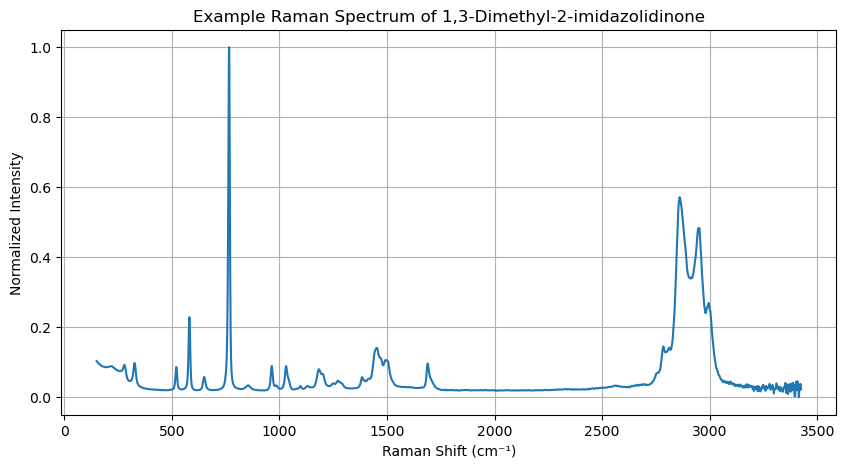

In [2]:
# Separate features and labels
X = spectra_df.drop(columns='label')
y = spectra_df['label']

# Clean column names (convert wavenumber strings to integers)
X.columns = X.columns.astype(float).astype(int)

# Normalize spectra
X_normalized = pd.DataFrame(MinMaxScaler().fit_transform(X.T).T, columns=X.columns)
X_normalized['label'] = y.values

# Select and plot a sample spectrum
compound = '1,3-Dimethyl-2-imidazolidinone'
example_spectrum = X_normalized[X_normalized['label'] == compound].iloc[0][:-1]

plt.figure(figsize=(10, 5))
plt.plot(example_spectrum.index, example_spectrum.values)
plt.title(f"Example Raman Spectrum of {compound}")
plt.xlabel("Raman Shift (cm⁻¹)")
plt.ylabel("Normalized Intensity")
plt.grid(True)
plt.show()

## 🔹 Step 2: Annotating Raman Spectrum with Expected Bands

To better interpret the spectrum, we overlay the expected Raman shift positions for the selected compound using the reference data from the metadata file. This allows us to visually assess how well the measured spectrum aligns with known characteristic peaks.


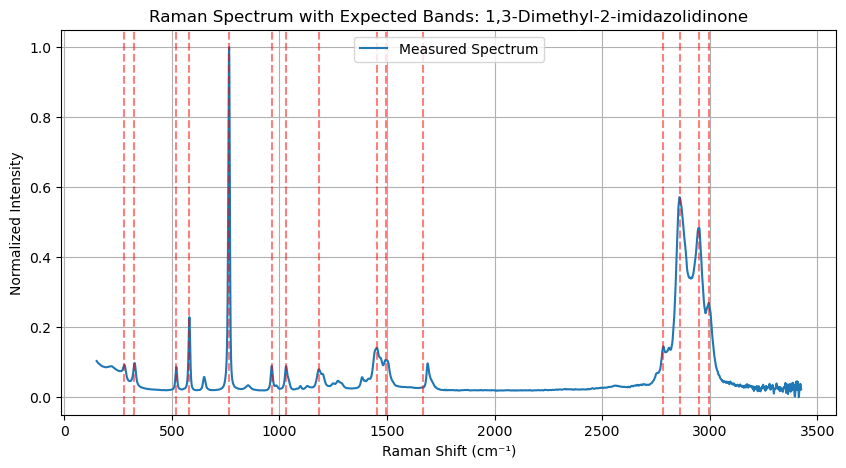

In [3]:
# Extract expected Raman band positions from metadata
band_row = metadata[metadata['Compound'] == compound].iloc[0]
band_list = [float(x.strip()) for x in band_row["Approx. Raman bands (deviation of 2 cm-1 per external sources)"].split(',')]

# Plot measured spectrum with expected Raman bands
plt.figure(figsize=(10, 5))
plt.plot(example_spectrum.index, example_spectrum.values, label="Measured Spectrum")

# Overlay expected bands as vertical dashed lines
for band in band_list:
    plt.axvline(band, color='red', linestyle='--', alpha=0.5)

plt.title(f"Raman Spectrum with Expected Bands: {compound}")
plt.xlabel("Raman Shift (cm⁻¹)")
plt.ylabel("Normalized Intensity")
plt.legend()
plt.grid(True)
plt.show()


## Step 3: Average Raman Spectrum of a Compound

We compute the average spectrum for a selected compound by averaging all its measured spectra. This helps reduce noise and highlights consistent spectral features.


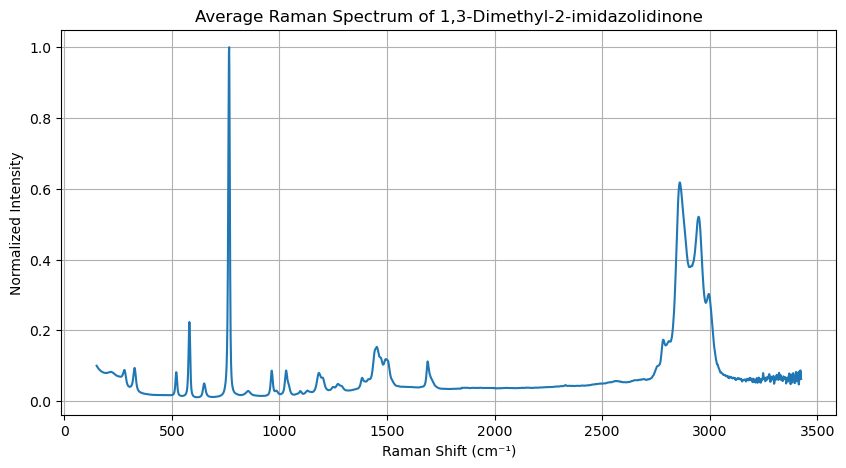

In [4]:
# Compute average spectrum for the selected compound
avg_spectrum = X_normalized[X_normalized['label'] == compound].drop(columns='label').mean()

# Plot the average spectrum
plt.figure(figsize=(10, 5))
plt.plot(avg_spectrum.index, avg_spectrum.values)
plt.title(f"Average Raman Spectrum of {compound}")
plt.xlabel("Raman Shift (cm⁻¹)")
plt.ylabel("Normalized Intensity")
plt.grid(True)
plt.show()


## Step 4: Comparison of Average Spectra Across Compounds

We compare the average spectra of multiple compounds to observe differences in their spectral fingerprints.


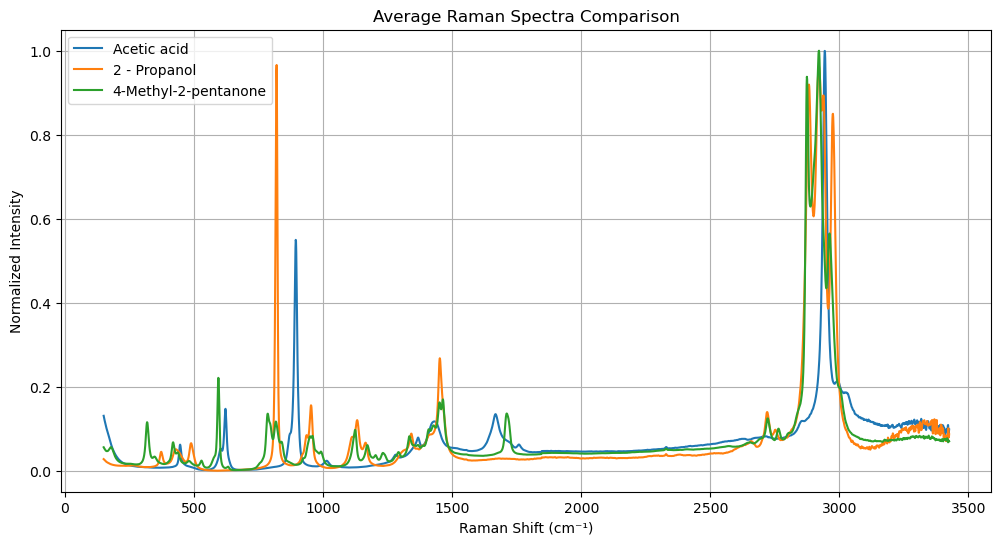

In [5]:
# Define compounds to compare
compounds_to_plot = ['Acetic acid', '2 - Propanol', '4-Methyl-2-pentanone']

# Plot their average spectra
plt.figure(figsize=(12, 6))

for comp in compounds_to_plot:
    if comp in X_normalized['label'].values:
        avg_spectrum = X_normalized[X_normalized['label'] == comp].drop(columns='label').mean()
        plt.plot(avg_spectrum.index, avg_spectrum.values, label=comp)
    else:
        print(f"Compound not found: {comp}")

plt.title("Average Raman Spectra Comparison")
plt.xlabel("Raman Shift (cm⁻¹)")
plt.ylabel("Normalized Intensity")
plt.legend()
plt.grid(True)
plt.show()


## Step 5: Peak Detection in a Raman Spectrum

Using a simple peak detection algorithm, we highlight key peaks in the selected spectrum to identify characteristic Raman shifts.


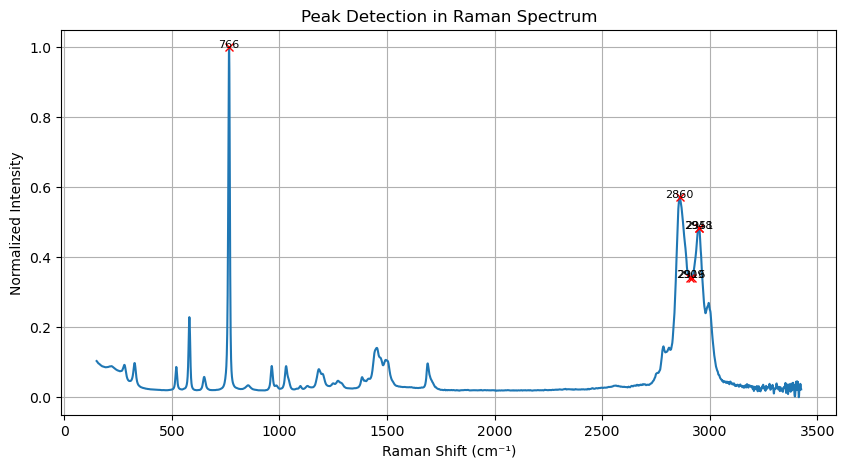

In [6]:
from scipy.signal import find_peaks

# Prepare data
y_vals = example_spectrum.values
x_vals = example_spectrum.index

# Detect peaks with a simple threshold
peaks, _ = find_peaks(y_vals, height=0.3)

# Plot spectrum with detected peaks
plt.figure(figsize=(10, 5))
plt.plot(x_vals, y_vals)
plt.plot(x_vals[peaks], y_vals[peaks], "rx")

# Annotate peaks
for peak in peaks:
    plt.text(x_vals[peak], y_vals[peak], f"{x_vals[peak]}", ha='center', fontsize=8)

plt.title("Peak Detection in Raman Spectrum")
plt.xlabel("Raman Shift (cm⁻¹)")
plt.ylabel("Normalized Intensity")
plt.grid(True)
plt.show()


## Step 6: PCA – Dimensionality Reduction and Visualization

We apply Principal Component Analysis (PCA) to reduce the high-dimensional Raman spectra to two dimensions. This helps us visualize the data and assess whether different compounds exhibit distinct clustering patterns in the reduced space.


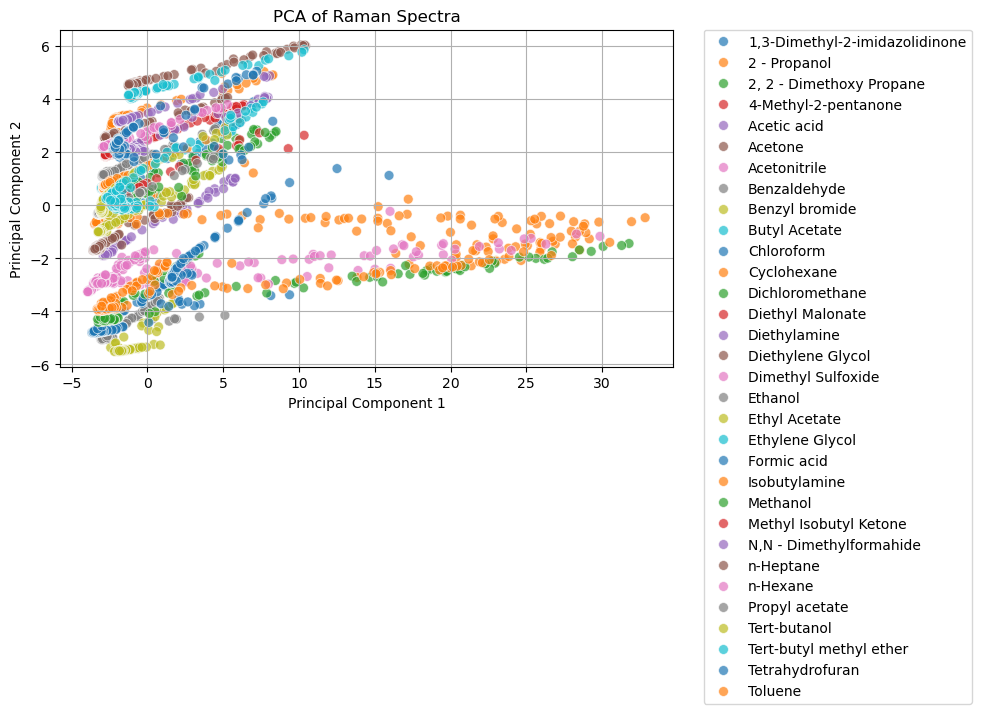

In [9]:
from sklearn.decomposition import PCA
import seaborn as sns

# Prepare features and labels
features = X_normalized.drop(columns='label')
labels = X_normalized['label']

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(features)

# Create a DataFrame for plotting
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['label'] = labels.values

# Plot PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='label', palette='tab10', s=50, alpha=0.7)
plt.title('PCA of Raman Spectra')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid(True)
plt.tight_layout()
plt.show()


In [12]:
print(pca.explained_variance_ratio_[:2].sum())

0.739925583705187


## PCA Result Summary

We applied Principal Component Analysis (PCA) to reduce the high-dimensional Raman spectra to two principal components. The resulting 2D scatter plot visualizes each spectrum colored by its corresponding compound label.

- **Explained Variance (PC1 + PC2):** 73.99%

This means that nearly 74% of the total variance in the original spectra is captured by just the first two components, making this 2D projection highly informative.

From the plot, we observe that some compounds (e.g., *2-Propanol*, *1,3-Dimethyl-2-imidazolidinone*) are well-separated, while others overlap, indicating that while PCA reveals clear patterns, some classes may require more advanced techniques (or higher dimensions) for full separation.


## Step 7: Classification – Logistic Regression

We trained a multinomial logistic regression model to classify Raman spectra into their respective compound labels.

- **Overall accuracy:** 98%
- **Macro average F1-score:** 97%
- **Weighted average F1-score:** 97%

Out of 31 compound classes:
- Most compounds were classified with perfect precision and recall.
- Two compounds, *4-Methyl-2-pentanone* and *Methyl Isobutyl Ketone*, showed noticeable confusion:
  - *4-Methyl-2-pentanone*: precision = 0.62, recall = 0.40
  - *Methyl Isobutyl Ketone*: precision = 0.57, recall = 0.76

This suggests these two compounds have highly similar spectra or overlapping features.


Test Accuracy: 0.98

Classification Report:
                                precision    recall  f1-score   support

1,3-Dimethyl-2-imidazolidinone       1.00      1.00      1.00        22
                  2 - Propanol       1.00      1.00      1.00        22
      2, 2 - Dimethoxy Propane       1.00      1.00      1.00        21
          4-Methyl-2-pentanone       0.62      0.40      0.48        20
                   Acetic acid       1.00      1.00      1.00        23
                       Acetone       1.00      1.00      1.00        24
                  Acetonitrile       1.00      1.00      1.00        21
                  Benzaldehyde       1.00      1.00      1.00        24
                Benzyl bromide       1.00      1.00      1.00        22
                 Butyl Acetate       1.00      1.00      1.00        21
                    Chloroform       1.00      1.00      1.00        25
                   Cyclohexane       1.00      1.00      1.00        29
               Dich

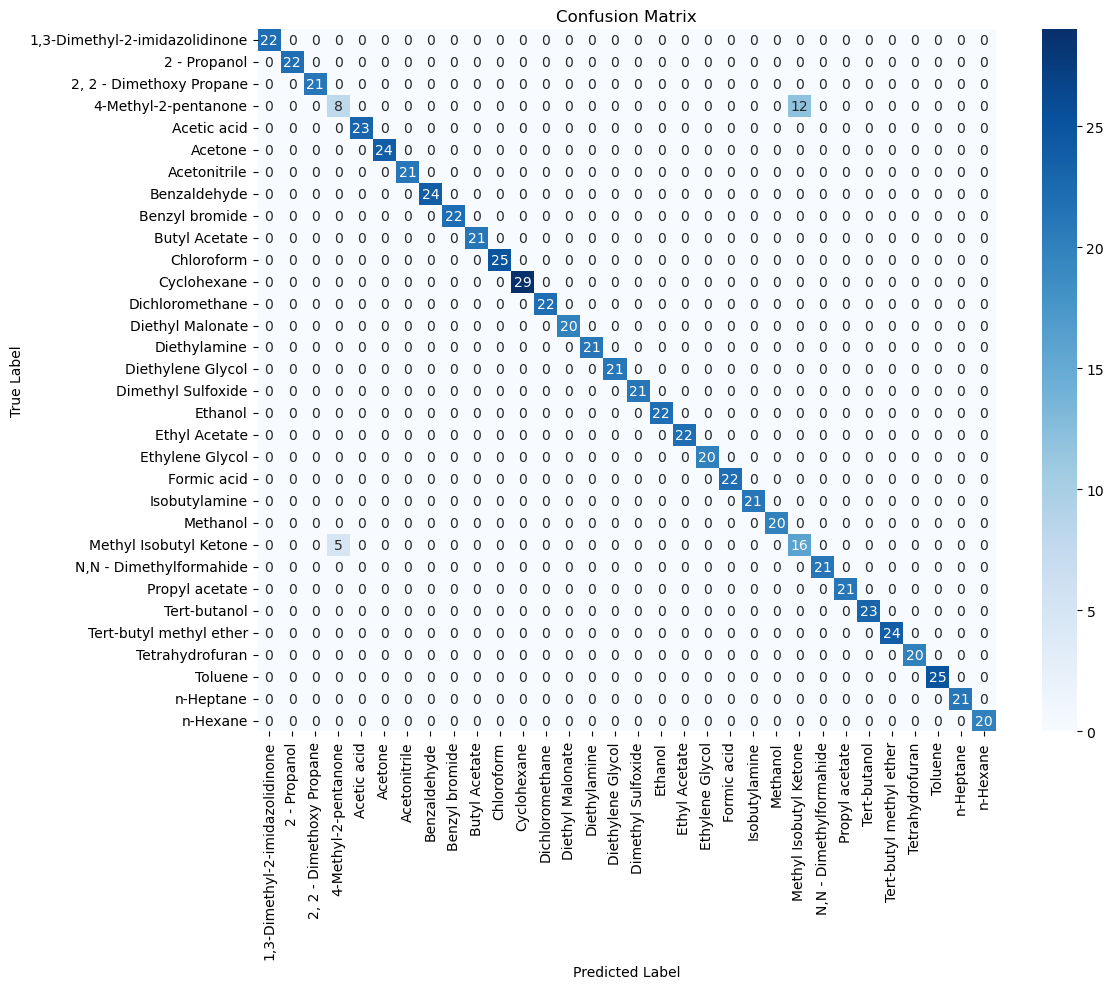

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns


# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.2, random_state=42, stratify=labels
)

# Train the model
clf = LogisticRegression(max_iter=1000, solver='lbfgs')
clf.fit(X_train, y_train)

# Predict on test set
y_pred = clf.predict(X_test)

# Evaluate performance
acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {acc:.2f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


## Step 8: t-SNE Visualization of Raman Spectra

While PCA captures global variance structure, t-SNE is designed to reveal local clusters and relationships. We apply t-SNE to project the high-dimensional Raman spectra into two dimensions.

The resulting visualization shows distinct clusters for most compounds, highlighting strong separability based on their spectral signatures. Compared to PCA, t-SNE provides clearer and more visually appealing class boundaries.


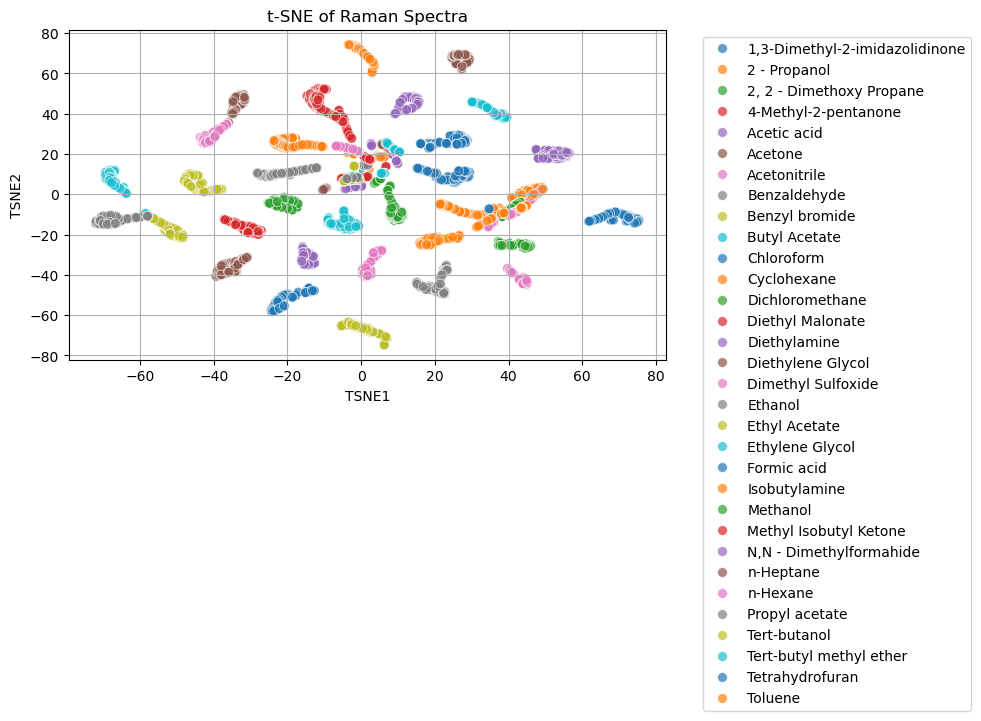

In [18]:
from sklearn.manifold import TSNE

X_tsne = TSNE(n_components=2, random_state=42).fit_transform(features)

tsne_df = pd.DataFrame(X_tsne, columns=["TSNE1", "TSNE2"])
tsne_df["label"] = labels.values

plt.figure(figsize=(10, 6))
sns.scatterplot(data=tsne_df, x="TSNE1", y="TSNE2", hue="label", s=50, alpha=0.7, palette="tab10")
plt.title("t-SNE of Raman Spectra")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


## Step 9: UMAP Visualization of Raman Spectra

To explore the structure of high-dimensional Raman spectra, we used Uniform Manifold Approximation and Projection (UMAP) to reduce the data to two dimensions.

UMAP is a non-linear dimensionality reduction technique that balances both global and local structure preservation. Compared to PCA and t-SNE, it often provides more stable clusters and is well-suited for visualizing spectral similarity between compounds.

The resulting plot shows that most compounds form well-separated clusters, with minimal overlap. This reinforces the idea that Raman spectra carry distinct, classifiable signatures for each compound.

UMAP also executes efficiently and produces consistent layouts across runs, making it a strong complement to PCA and t-SNE in exploratory analysis.


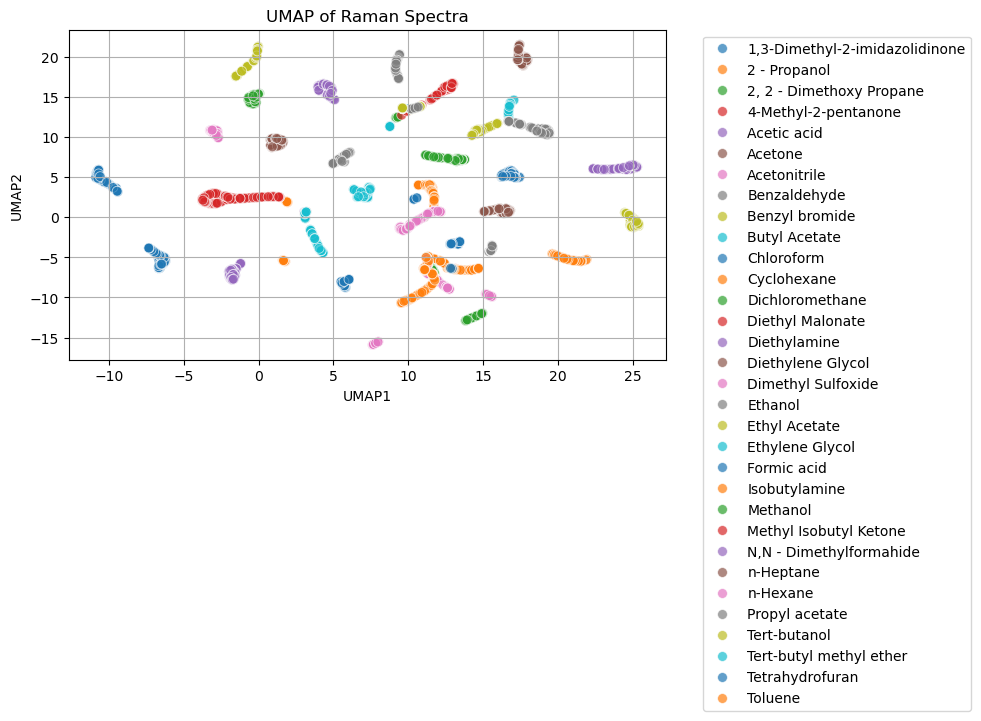

In [31]:
import umap.umap_ as umap
import warnings

warnings.filterwarnings("ignore", message="n_jobs value 1 overridden to 1 by setting random_state*")



# Run UMAP
umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(features)

# Create a DataFrame for plotting
umap_df = pd.DataFrame(X_umap, columns=["UMAP1", "UMAP2"])
umap_df["label"] = labels.values

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=umap_df, x="UMAP1", y="UMAP2", hue="label", s=50, alpha=0.7, palette="tab10")
plt.title("UMAP of Raman Spectra")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


## Step 10: Feature Importance – Key Raman Shifts

To identify which regions of the Raman spectra contribute most to compound classification, we trained a Random Forest classifier and analyzed the top 20 most important Raman shifts.

The resulting plot shows that:

- Important features are concentrated in two main regions:
  - Around **600–1000 cm⁻¹**, which likely corresponds to fingerprint region vibrations
  - Around **2800–3000 cm⁻¹**, typically associated with C–H stretching vibrations
- These regions are known to contain chemically meaningful peaks in Raman spectroscopy and may play a key role in distinguishing API compounds.

This analysis demonstrates that the model is leveraging interpretable spectral patterns rather than noise, aligning well with known chemical behavior.


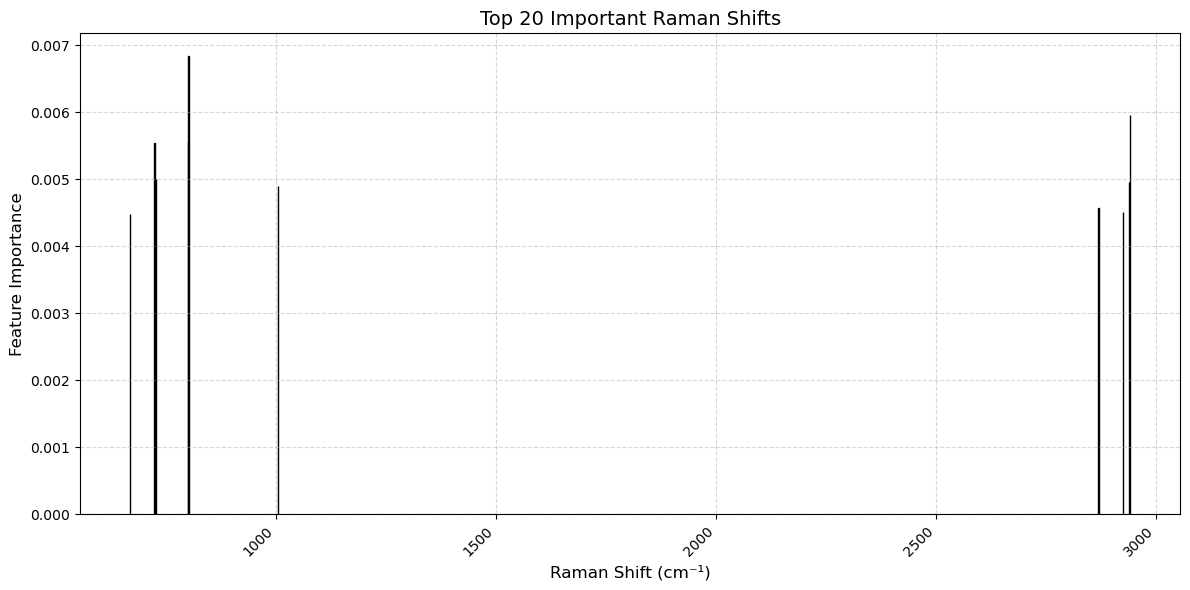

In [23]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

importances = rf.feature_importances_
top_indices = importances.argsort()[-10:][::-1]

plt.figure(figsize=(12, 6))
plt.bar(
    [X.columns[i] for i in top_indices], 
    importances[top_indices], 
    color='red', 
    edgecolor='black'  
)
plt.title("Top 20 Important Raman Shifts", fontsize=14)
plt.xlabel("Raman Shift (cm⁻¹)", fontsize=12)
plt.ylabel("Feature Importance", fontsize=12)
plt.xticks(rotation=45, ha='right')  
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
